### ExerciseH5.1: Cross-validation

In [93]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

trainData = pd.read_csv("TrainingRidge.csv")
trainData.head(5)


x1   x2  obs
0  140  116   10
1  198   88   14
2  174  112    2
3  168   52   32
4  206   44   10

In [94]:
trainData.shape

(200, 3)

In [95]:
validationData = pd.read_csv("ValidationRidge.csv")
validationData.head(5)

x1  x2       dens
0  140  40  10.447548
1  142  40  10.678885
2  144  40  10.987773
3  146  40  11.378550
4  148  40  11.845408

In [96]:
validationData.shape   # 36*41 grid of (x1, x2) input values 

(1476, 3)

In [97]:
V= validationData[['x1','x2']]
V.head(5)

x1  x2
0  140  40
1  142  40
2  144  40
3  146  40
4  148  40

In [121]:
V = V - V.mean()   # centering the validation imput samples
V.mean()

x1    0.0
x2    0.0
dtype: float64

In [122]:
np.corrcoef(V['x1'],V['x2'])   # perfectly decorrelated variables 

array([[ 1.,  0.],
       [ 0.,  1.]])

** a ) 
Perform whitening (sphering) of the training data, such that the resulting input samples are decorrelated, have zero mean and unit variance. **

In [100]:
Xtrain= trainData[['x1','x2']]
#Xtrain = (Xtrain - Xtrain.mean())/np.std(Xtrain)   # standardizing the data (the mean iz 0 and the variance is 1)
#Xtrain.mean(), np.var(Xtrain)

Xtrain = Xtrain - Xtrain.mean()   # centering the training input samples
Xtrain.mean()

x1   -1.250555e-14
x2    0.000000e+00
dtype: float64

In [132]:
Xtrain.shape

(200, 2)

In [101]:
np.corrcoef(Xtrain['x1'],Xtrain['x2'])  # correlation between two variables / features is almost zero

array([[ 1.        ,  0.04874507],
       [ 0.04874507,  1.        ]])

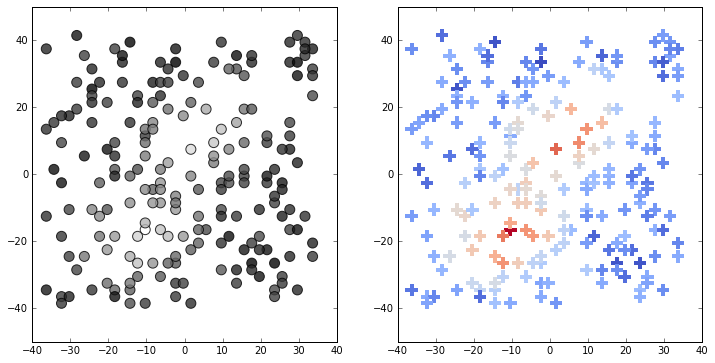

In [102]:
#plt.scatter(Xtrain['x1'], Xtrain['x2'], labels = trainData['obs'])
trainData['obs']
#plt.scatter(Xtrain['x1'], Xtrain['x2'], marker='+', s=150, linewidths=4, c= trainData['obs'], cmap=plt.cm.coolwarm)

plt.figure(figsize=(12, 6))
plt.subplot(121)

plt.scatter(Xtrain['x1'], Xtrain['x2'],c= trainData['obs'], s=100, alpha = 0.8, )
plt.gray()
plt.subplot(122)
plt.scatter(Xtrain['x1'], Xtrain['x2'], marker='+', s=150, linewidths=4, c= trainData['obs'], cmap=plt.cm.coolwarm)

In [103]:
C = (1./Xtrain.shape[0])*np.dot(np.asarray(Xtrain).T, np.asarray(Xtrain))  #covariance matrix
C

array([[ 394.7111,   22.535 ],
       [  22.535 ,  541.47  ]])

In [104]:
eigenValues, eigenVectors = np.linalg.eig(C)

In [105]:
eigenValues

array([ 391.32877626,  544.85232374])

In [106]:
eigenVectors

array([[-0.988923  , -0.14842945],
       [ 0.14842945, -0.988923  ]])

In [107]:
eigValMatrix = np.eye(2, dtype=int)*eigenValues
eigValMatrix

array([[ 391.32877626,    0.        ],
       [   0.        ,  544.85232374]])

In [108]:
import scipy.linalg as la
A = np.linalg.inv(la.sqrtm(eigValMatrix))  
A

array([[ 0.05055093,  0.        ],
       [ 0.        ,  0.0428411 ]])

In [131]:
Xsphered = np.dot(np.dot(A, eigenVectors.T), Xtrain.T)
Xsphered.shape

(2L, 200L)

In [128]:
np.var(Xsphered, axis=1)  # variance( standard deviation of the whitened training data has the variance = 1)

array([ 1.,  1.])

In [127]:
Xsphered.mean(axis = 1)  # mean is very close to zero

array([  6.39488462e-16,   8.88178420e-17])

In [129]:
np.corrcoef(Xsphered[0,:], Xsphered[1, :])  #covariance between the features of training input data is close to 0

array([[  1.00000000e+00,   5.73953496e-17],
       [  5.73953496e-17,   1.00000000e+00]])

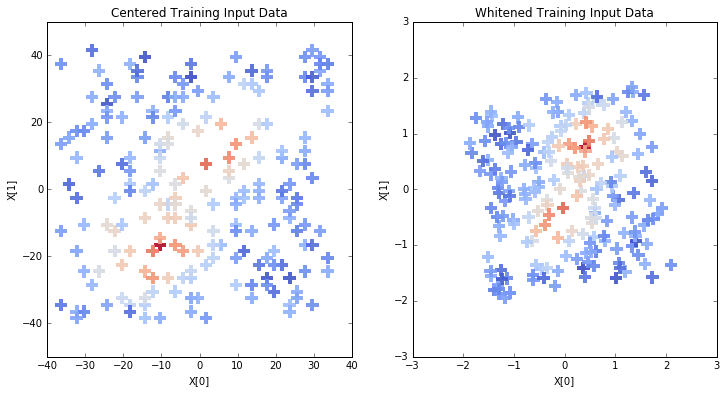

In [130]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(Xtrain[[0]], Xtrain[[1]], c= trainData['obs'], marker='+', s=150, linewidths=4,  alpha=0.9, cmap=plt.cm.coolwarm)
plt.title("Centered Training Input Data")
plt.xlabel("X[0]")
plt.ylabel("X[1]")
plt.subplot(122)
plt.scatter(Xsphered[0], Xsphered[1], c= trainData['obs'], marker='+', s=150, linewidths=4,  alpha=0.9, cmap=plt.cm.coolwarm)
plt.title("Whitened Training Input Data")
plt.xlabel("X[0]")
plt.ylabel("X[1]")


**  Use the same sphering transformation as obtained from the eigendecomposition of the centered training data’s covariance matrix also to sphere the validation set (i.e., do not compute a separate sphering transformation for that purpose). **

In [114]:
Vsphered = np.dot(np.dot(A, eigenVectors.T), V.T)
Vsphered.shape

(2L, 1476L)

In [115]:
np.var(Vsphered, axis=1)   # varaiance is close two 1

array([ 1.11030429,  1.02261223])

In [116]:
Vsphered.mean() # mean is close to 0

-1.9255900698105696e-17

In [134]:
np.corrcoef(Vsphered[0,:],Vsphered[1,:]) # covariance between the imput features in the validation set is close to zero

array([[ 1.        , -0.03828558],
       [-0.03828558,  1.        ]])

In [118]:
validationData['dens'].shape

(1476L,)

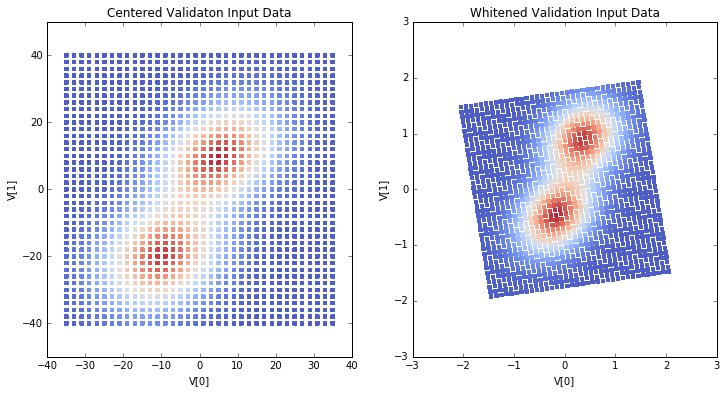

In [138]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(V[[0]], V[[1]], c = validationData['dens'], marker='+', linewidths=4,  alpha=0.9, cmap=plt.cm.coolwarm)
plt.title("Centered Validaton Input Data")
plt.xlabel("V[0]")
plt.ylabel("V[1]")
plt.subplot(122)
plt.scatter(Vsphered[0], Vsphered[1], c = validationData['dens'], marker='+', linewidths=4,  alpha=0.9, cmap=plt.cm.coolwarm)
plt.title("Whitened Validation Input Data")
plt.xlabel("V[0]")
plt.ylabel("V[1]")


** b)**

** A single linear neuron is not able to predict the target labels very well. To increase the representational power of the model class, expand the sphered 2-dimensional input samples to all possible monomials up to degree 9. **

In [195]:
# generate monomial exponents
exps = []

for k in range(10):
    for i in range(k+1):
        j = k-i
        exps.append([i, j])
len(exps)

55

In [196]:
exps[:10]  # monomial exponents up to a 3rd degree

[[0, 0],
 [0, 1],
 [1, 0],
 [0, 2],
 [1, 1],
 [2, 0],
 [0, 3],
 [1, 2],
 [2, 1],
 [3, 0]]

In [197]:
# function that generates radial basis functions when 

def phi(X, exps):
    return X[:,0]**exps[0]*X[:,1]**exps[1]


In [198]:
Xsphered.T.shape, Xtrain.shape

((200L, 2L), (200, 2))

In [199]:
Xsphered.T.shape

(200L, 2L)

In [200]:
#phis =  np.empty((len(exps), Xtrain.shape[0]))
phis = np.zeros(shape = (len(exps), Xsphered.shape[1]))

for i in range(len(exps)):
    p = np.array([phi(np.asarray(Xsphered.T), exps[i])])
    phis[i] = p
    #phis = np.append(phis, p, axis=0)

phis.shape

(55L, 200L)

In [201]:
Y = np.array([trainData['obs']])
A = np.linalg.inv(np.dot(phis, phis.T))
w = np.dot(np.dot(A, phis), Y.T)
Y.shape, A.shape, w.shape

((1L, 200L), (55L, 55L), (55L, 1L))

In [204]:
y_hat = np.dot(w.T, phis)
y_hat.shape

(1L, 200L)

** Plot on the validation set the ﬁrst 10 monomials as well as the predicted function y(x) either as a scatter plot or as a 36×41 image, where the colors indicate the labels. **

In [210]:
# First 10 monomials on the validation set

phisV = np.zeros(shape = (10, V.shape[0]))
phisV.shape

(10L, 1476L)

In [222]:
for i in range(phisV.shape[0]):
    p = np.array([phi(np.asarray(Vsphered.T), exps[i])])
    phisV[i] = p

In [223]:
phisV.shape

(10L, 1476L)

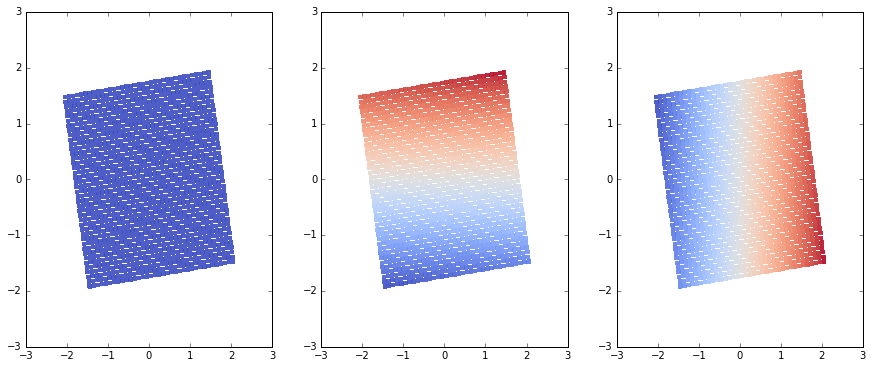

In [250]:
plt.figure(figsize=(15, 6))
plt.subplot(231)
plt.scatter(Vsphered[0], Vsphered[1], c = phisV[0,:], marker='+', linewidths=4,  alpha=0.9, cmap=plt.cm.coolwarm)
plt.subplot(132)
plt.scatter(Vsphered[0], Vsphered[1], c = phisV[1,:], marker='+', linewidths=4,  alpha=0.9, cmap=plt.cm.coolwarm)
plt.subplot(133)
plt.scatter(Vsphered[0], Vsphered[1], c = phisV[2,:], marker='+', linewidths=4,  alpha=0.9, cmap=plt.cm.coolwarm)


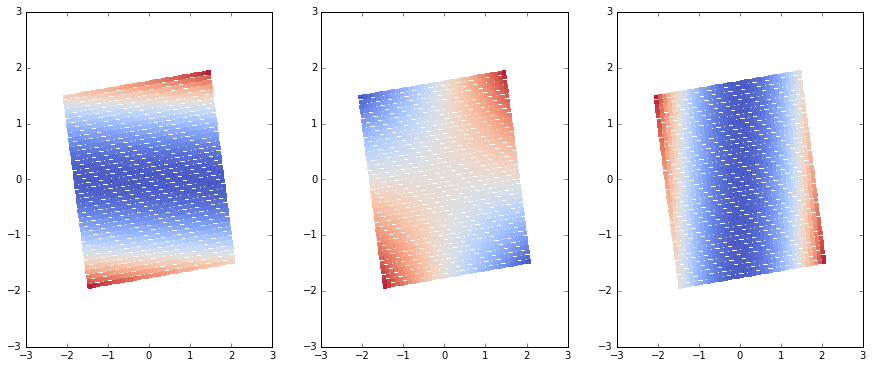

In [251]:
plt.figure(figsize=(15, 6))
plt.subplot(131)
plt.scatter(Vsphered[0], Vsphered[1], c = phisV[3,:], marker='+', linewidths=4,  alpha=0.9, cmap=plt.cm.coolwarm)
plt.subplot(132)
plt.scatter(Vsphered[0], Vsphered[1], c = phisV[4,:], marker='+', linewidths=4,  alpha=0.9, cmap=plt.cm.coolwarm)
plt.subplot(133)
plt.scatter(Vsphered[0], Vsphered[1], c = phisV[5,:], marker='+', linewidths=4,  alpha=0.9, cmap=plt.cm.coolwarm)



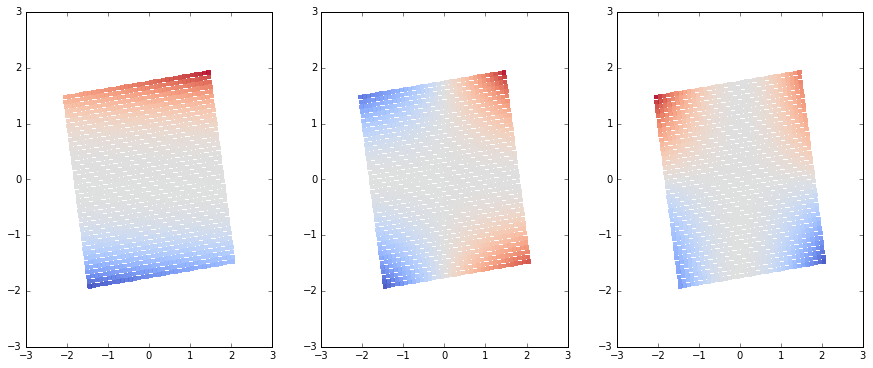

In [252]:
plt.figure(figsize=(15, 6))
plt.subplot(131)
plt.scatter(Vsphered[0], Vsphered[1], c = phisV[6,:], marker='+', linewidths=4,  alpha=0.9, cmap=plt.cm.coolwarm)
plt.subplot(132)
plt.scatter(Vsphered[0], Vsphered[1], c = phisV[7,:], marker='+', linewidths=4,  alpha=0.9, cmap=plt.cm.coolwarm)
plt.subplot(133)
plt.scatter(Vsphered[0], Vsphered[1], c = phisV[8,:], marker='+', linewidths=4,  alpha=0.9, cmap=plt.cm.coolwarm)



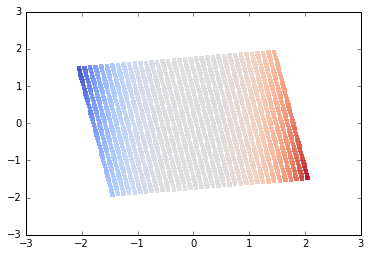

In [255]:
plt.scatter(Vsphered[0], Vsphered[1], c = phisV[9,:], marker='+', linewidths=4,  alpha=0.9, cmap=plt.cm.coolwarm)